# The tendency toward disorder
In this tutorial, we see the tendency of processes toward higher entropy by using a monte carlo simulation.

First, let's start with the randomized lattice from earlier.

m_1, m_2, m_sites = 295 105 400


1.6815702023602425e-21

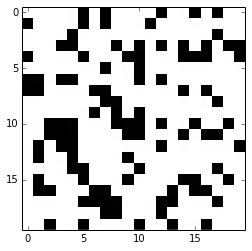

In [163]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from random import random

lattice_width = 20
lattice_height = 20
m_sites = lattice_width*lattice_height
lattice = np.zeros((lattice_height,lattice_width))

m_1 = 0
m_2 = 0

for i in range(0,lattice_height):
    for j in range(0,lattice_width):
        random_number = random()
        if random_number > 0.25:
            lattice[i,j] = 1
            m_1 += 1
        else:
            lattice[i,j] = 2
            m_2 += 1
print 'm_1, m_2, m_sites =', m_1, m_2, m_sites
plt.imshow(lattice,cmap="Greys",interpolation='None')
k_boltzmann = 1.38064852e-23 #m2 kg s-2 K-1
S_m = -1*k_boltzmann*(m_1*np.log(m_1/m_sites)+m_2*np.log(m_1/m_sites))
S_m

## The unmixed macrostate
Now, let's take this lattice and artificially order it. We will use the same number of state 1 and state 2 particles as with our randomized lattice, but this time we will group them together. Let's call this the "unmixed" macrostate. 

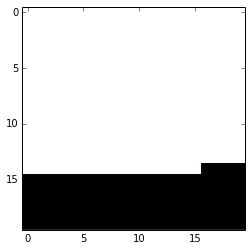

In [164]:
lattice2 = np.zeros((lattice_height,lattice_width))
counter = 0
for i in range(0,lattice_height):
    for j in range(0,lattice_width):
        if counter <= m_1:
            lattice2[i,j] = 1
            counter += 1
        else:
            lattice2[i,j] = 2
            counter += 1
plt.imshow(lattice2,cmap="Greys",interpolation='None')

## Monte Carlo mixing of the unmixed lattice
Great, so now that we have our unmixed lattice, let's randomly pick sites in the lattice and exchange them with a randomly chosen nearest neighbor either above, below, left, or right of the chosen site.

For this we will assume a periodic boundary condition - that is, the edges of the lattice are neighbors of the opposite edge. 

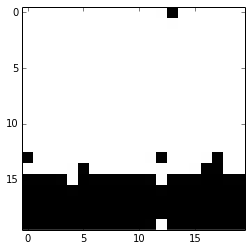

In [165]:
from random import choice
from matplotlib import animation


def mix(iterations):
    iterations = iterations
    energy=1
    condition = 0
    for iterate in range(0,iterations):
        random_x_direction = choice([-1,1])
        random_y_direction = choice([-1,1])
        target_x_coordinate = choice(range(0,lattice_width-1))
        target_y_coordinate = choice(range(0,lattice_height-1))
        neighbor_x_coordinate = target_x_coordinate + random_x_direction
        neighbor_y_coordinate = target_y_coordinate + random_y_direction
        target_value = lattice2[target_x_coordinate, target_y_coordinate]
        neighbor_value = lattice2[neighbor_x_coordinate, neighbor_y_coordinate]
        if energy > condition:
            lattice2[target_x_coordinate, target_y_coordinate] = neighbor_value
            lattice2[neighbor_x_coordinate, neighbor_y_coordinate] = target_value
        else:
            pass            
    return plt.imshow(lattice2,cmap="Greys",interpolation='None')

mix(100)


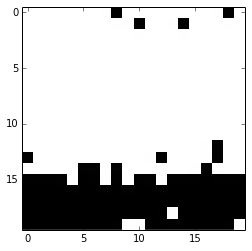

In [166]:
mix(200)

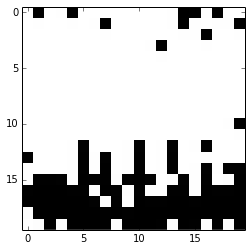

In [167]:
mix(400)

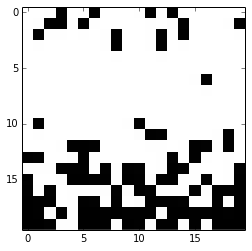

In [168]:
mix(800)

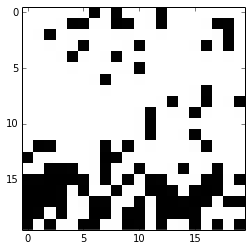

In [169]:
mix(1600)